In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from sklearn.preprocessing import StandardScaler

In [97]:
from fim import apriori

In [98]:
df=pd.read_csv("ravdess_features.csv")
dfcopy = df.copy()

In [99]:
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,...,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,...,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,...,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


## Filling missing values of intensity & frame_count

Intensity

In [100]:
df_empty_intensity = df[df["intensity"].isna()]
df_full_intensity = df[df["intensity"].notnull()]

In [101]:
df_full_train_intensity, df_full_test_intensity = train_test_split(df_full_intensity, test_size=0.3, random_state=100)

In [102]:
x_train = df_full_train_intensity["mfcc_min"].values.reshape(-1, 1)
y_train = df_full_train_intensity["intensity"].values

x_test = df_full_test_intensity["mfcc_min"].values.reshape(-1, 1)
y_test = df_full_test_intensity["intensity"].values

x = df_empty_intensity["mfcc_min"].values.reshape(-1, 1)
y = df_empty_intensity["intensity"]

In [103]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [104]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.950
MSE: 3.518
MAE: 1.518


In [105]:
y = reg.predict(x)

na = df["intensity"].isna()
df.loc[na, "intensity"] = y

Frame count

In [106]:
df_empty_fc = df[df["frame_count"] == -1]
df_full_fc = df[df["frame_count"] != -1]

In [107]:
df_full_train_fc, df_full_test_fc = train_test_split(df_full_vc, test_size=0.3, random_state=100)

In [108]:
x_train = df_full_train_fc["length_ms"].values.reshape(-1, 1)
y_train = df_full_train_fc["frame_count"].values

x_test = df_full_test_fc["length_ms"].values.reshape(-1, 1)
y_test = df_full_test_fc["frame_count"].values

x = df_empty_fc["length_ms"].values.reshape(-1, 1)
y = df_empty_fc["frame_count"]

In [109]:
reg.fit(x_train, y_train)

LinearRegression()

In [110]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 1.000
MSE: 195.090
MAE: 12.147


In [111]:
y = reg.predict(x)

na = df["frame_count"] == -1
df.loc[na, "intensity"] = y

## Preparation

In [112]:
df=df.drop(columns=["modality", "repetition", "actor", "channels","sample_width", "frame_rate", "frame_width", "sc_min", "stft_min", "stft_max"])

In [113]:
df["length_bin"] = pd.qcut(df["length_ms"], 4)
df["frame_count_bin"] = pd.qcut(df["frame_count"], 4)
df["intensity_bin"] = pd.qcut(df["intensity"], 4)
df["zero_crossings_sum_bin"] = pd.qcut(df["zero_crossings_sum"], 4)
df["mfcc_mean_bin"] = pd.qcut(df["mfcc_mean"], 4)
df["mfcc_std_bin"] = pd.qcut(df["mfcc_std"], 4)
df["mfcc_min_bin"] = pd.qcut(df["mfcc_min"], 4)
df["mfcc_max_bin"] = pd.qcut(df["mfcc_max"], 4)
df["sc_mean_bin"] = pd.qcut(df["sc_mean"], 4)
df["sc_std_bin"] = pd.qcut(df["sc_std"], 4)
df["sc_max_bin"] = pd.qcut(df["sc_max"], 4)
df["sc_kur_bin"] = pd.qcut(df["sc_kur"], 4)
df["sc_skew_bin"] = pd.qcut(df["sc_skew"], 4)
df["stft_mean_bin"] = pd.qcut(df["stft_mean"], 4)
df["stft_std_bin"] = pd.qcut(df["stft_std"], 4)
df["stft_kur_bin"] = pd.qcut(df["stft_kur"], 4)
df["stft_skew_bin"] = pd.qcut(df["stft_skew"], 4)
df["mean_bin"] = pd.qcut(df["mean"], 4)
df["std_bin"] = pd.qcut(df["std"], 4)
df["max_bin"] = pd.qcut(df["max"], 4)
df["min_bin"] = pd.qcut(df["min"], 4)
df["kur_bin"] = pd.qcut(df["kur"], 4)
df["skew_bin"] = pd.qcut(df["skew"], 4)

df = df.drop(columns = ["length_ms", "frame_count", "intensity", "zero_crossings_sum", "mfcc_mean", "mfcc_std", "mfcc_min", "mfcc_max",
                        "sc_mean", "sc_std", "sc_max", "sc_kur", "sc_skew", "stft_mean", "stft_std", "stft_kur", "stft_skew",
                        "mean", "std", "max", "min", "kur", "skew"])

In [114]:
df["length_bin"] = df.length_bin.astype(str) + "_length"
df["frame_count_bin"] = df.frame_count_bin.astype(str) + "_frame_count"
df["intensity_bin"] = df.intensity_bin.astype(str) + "_intensity"
df["zero_crossings_sum_bin"] = df.zero_crossings_sum_bin.astype(str) + "_zero_crossings_sum"
df["mfcc_mean_bin"] = df.mfcc_mean_bin.astype(str) + "_mfcc_mean"
df["mfcc_std_bin"] = df.mfcc_std_bin.astype(str) + "_mfcc_std"
df["mfcc_min_bin"] = df.mfcc_min_bin.astype(str) + "_mfcc_min"
df["mfcc_max_bin"] = df.mfcc_max_bin.astype(str) + "_mfcc_max"
df["sc_mean_bin"] = df.sc_mean_bin.astype(str) + "_sc_mean"
df["sc_std_bin"] = df.sc_std_bin.astype(str) + "_sc_std"
df["sc_max_bin"] = df.sc_max_bin.astype(str) + "_sc_max"
df["sc_kur_bin"] = df.sc_kur_bin.astype(str) + "_sc_kur"
df["sc_skew_bin"] = df.sc_skew_bin.astype(str) + "_sc_skew"
df["stft_mean_bin"] = df.stft_mean_bin.astype(str) + "_stft_mean"
df["stft_std_bin"] = df.stft_std_bin.astype(str) + "_stft_std"
df["stft_kur_bin"] = df.stft_kur_bin.astype(str) + "_stft_kur"
df["stft_skew_bin"] = df.stft_skew_bin.astype(str) + "_stft_skew"
df["mean_bin"] = df.mean_bin.astype(str) + "_mean"
df["std_bin"] = df.std_bin.astype(str) + "_std"
df["max_bin"] = df.max_bin.astype(str) + "_max"
df["min_bin"] = df.min_bin.astype(str) + "_min"
df["kur_bin"] = df.kur_bin.astype(str) + "_kur"
df["skew_bin"] = df.skew_bin.astype(str) + "_skew"

In [115]:
df["emotion"]=df["emotion"].replace([0,1,2,3,4,5,6,7],["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"])
df["emotional_intensity"]=df["emotional_intensity"].replace([0,1],["normal", "strong"])
df["sex"]=df["sex"].replace([0,1],["M", "F"])
df["statement"]=df["statement"].replace([0,1],["Dogs are sitting by the door", "Kids are talking by the door"])
df["vocal_channel"]=df["vocal_channel"].replace([0,1],["speech", "song"])
df =df.drop(columns=["emotional_intensity", "statement", "sex"])
df.head()

,vocal_channel,emotion,length_bin,frame_count_bin,intensity_bin,zero_crossings_sum_bin,mfcc_mean_bin,mfcc_std_bin,mfcc_min_bin,mfcc_max_bin,...,stft_mean_bin,stft_std_bin,stft_kur_bin,stft_skew_bin,mean_bin,std_bin,max_bin,min_bin,kur_bin,skew_bin
0,speech,fearful,"(3604.0, 4004.0]_length","(172972.0, 190591.0]_frame_count","(-37.179, -31.509]_intensity","(14966.0, 30153.0]_zero_crossings_sum","(-43.814, -31.829]_mfcc_mean","(122.624, 136.524]_mfcc_std","(-760.983, -692.89]_mfcc_min","(126.25, 180.081]_mfcc_max",...,"(0.213, 0.415]_stft_mean","(0.334, 0.349]_stft_std","(-1.292, -1.153]_stft_kur","(0.336, 1.466]_stft_skew","(-9.81e-08, 8.36e-07]_mean","(0.0139, 0.0262]_std","(0.11, 0.224]_max","(-0.202, -0.104]_min","(6.52, 9.829]_kur","(0.263, 1.8]_skew"
1,speech,angry,"(3604.0, 4004.0]_length","(172972.0, 190591.0]_frame_count","(-37.179, -31.509]_intensity","(12383.5, 14966.0]_zero_crossings_sum","(-31.829, -28.681]_mfcc_mean","(122.624, 136.524]_mfcc_std","(-760.983, -692.89]_mfcc_min","(201.697, 218.185]_mfcc_max",...,"(0.415, 0.476]_stft_mean","(0.349, 0.392]_stft_std","(-1.391, -1.292]_stft_kur","(0.126, 0.336]_stft_skew","(-9.81e-08, 8.36e-07]_mean","(0.0139, 0.0262]_std","(0.224, 0.999]_max","(-1.0, -0.202]_min","(14.085, 59.086]_kur","(0.263, 1.8]_skew"
2,NaN,happy,"(4538.0, 6373.0]_length","(217817.0, 305906.0]_frame_count","(-37.179, -31.509]_intensity","(14966.0, 30153.0]_zero_crossings_sum","(-31.829, -28.681]_mfcc_mean","(122.624, 136.524]_mfcc_std","(-760.983, -692.89]_mfcc_min","(126.25, 180.081]_mfcc_max",...,"(0.213, 0.415]_stft_mean","(0.349, 0.392]_stft_std","(-1.292, -1.153]_stft_kur","(0.336, 1.466]_stft_skew","(8.36e-07, 0.00122]_mean","(0.0139, 0.0262]_std","(0.11, 0.224]_max","(-0.202, -0.104]_min","(1.7570000000000001, 6.52]_kur","(0.263, 1.8]_skew"
3,NaN,surprised,"(3604.0, 4004.0]_length","(172972.0, 190591.0]_frame_count","(-63.866, -43.343]_intensity","(10362.5, 12383.5]_zero_crossings_sum","(-43.814, -31.829]_mfcc_mean","(151.385, 195.943]_mfcc_std","(-1085.481, -826.464]_mfcc_min","(180.081, 201.697]_mfcc_max",...,"(0.213, 0.415]_stft_mean","(0.349, 0.392]_stft_std","(-1.6709999999999998, -1.391]_stft_kur","(0.126, 0.336]_stft_skew","(-9.81e-08, 8.36e-07]_mean","(-0.000348, 0.00679]_std","(0.0036699999999999997, 0.0555]_max","(-0.0544, -0.00613]_min","(9.829, 14.085]_kur","(-0.337, 0.00426]_skew"
4,song,happy,"(4004.0, 4538.0]_length","(190591.0, 217817.0]_frame_count","(-31.509, 253058.242]_intensity","(14966.0, 30153.0]_zero_crossings_sum","(-31.829, -28.681]_mfcc_mean","(83.61999999999999, 122.624]_mfcc_std","(-760.983, -692.89]_mfcc_min","(126.25, 180.081]_mfcc_max",...,"(0.415, 0.476]_stft_mean","(0.349, 0.392]_stft_std","(-1.391, -1.292]_stft_kur","(0.126, 0.336]_stft_skew","(8.36e-07, 0.00122]_mean","(0.0262, 0.152]_std","(0.224, 0.999]_max","(-0.202, -0.104]_min","(6.52, 9.829]_kur","(0.263, 1.8]_skew"


## Rules for vocal channel

In [147]:
df_null_bin = df[df["vocal_channel"].isna()]
df_full_bin = df[df["vocal_channel"].notnull()]
X_bin = df_full_bin.values.tolist()

In [148]:
df_null = dfcopy[dfcopy["vocal_channel"].isna()]
df_full = dfcopy[dfcopy["vocal_channel"].notnull()]
X = df_full.values.tolist()

In [151]:
len(X_bin) == len(X)

True

In [204]:
rules = apriori(X_bin, target="r", supp=20, zmin=2, conf=60, report="aScl")
rules_df = pd.DataFrame(rules, columns=["consequent", "antecedent", "abs_support", "%_support", "confidence", "lift"])

In [260]:
rules_df[rules_df["consequent"] == "speech"].sort_values(by = "confidence", ascending = False).head(15)

,consequent,antecedent,abs_support,%_support,confidence,lift
546,speech,"((-0.511, 0.0985]_sc_skew,)",568,25.177305,0.996491,1.683958
551,speech,"((-1.001, 172972.0]_frame_count, (2935.999, 36...",549,24.335106,0.994565,1.680703
558,speech,"((2935.999, 3604.0]_length,)",597,26.462766,0.993344,1.678640
238,speech,"((0.531, 0.724]_stft_mean, (-0.995, -0.0943]_s...",499,22.118794,0.980354,1.656687
420,speech,"((5775.96, 7655.336]_sc_mean,)",555,24.601064,0.978836,1.654123
412,speech,"((-0.995, -0.0943]_stft_skew,)",554,24.556738,0.977072,1.651142
249,speech,"((0.531, 0.724]_stft_mean,)",551,24.423759,0.975221,1.648014
556,speech,"((-1.001, 172972.0]_frame_count,)",559,24.778369,0.970486,1.640012
223,speech,"((172972.0, 190591.0]_frame_count,)",542,24.024823,0.960993,1.623970
89,speech,"((3604.0, 4004.0]_length, (172972.0, 190591.0]...",494,21.897163,0.959223,1.620980


In [265]:
rules_df[rules_df["consequent"] == "song"].sort_values(by = "confidence", ascending = False).head(15)#.to_string()

,consequent,antecedent,abs_support,%_support,confidence,lift
10,song,"((4538.0, 6373.0]_length,)",512,22.695035,0.946396,2.318207
2,song,"((4538.0, 6373.0]_length, (217817.0, 305906.0]...",505,22.384752,0.945693,2.316486
183,song,"((217817.0, 305906.0]_frame_count,)",526,23.315603,0.944345,2.313183
533,song,"((1.7570000000000001, 6.52]_kur,)",517,22.916667,0.908612,2.225654
221,song,"((0.557, 1.825]_sc_skew,)",436,19.326241,0.774423,1.896957
140,song,"((2360.8799999999997, 4563.685]_sc_mean,)",401,17.774823,0.723827,1.773022
205,song,"((0.336, 1.466]_stft_skew,)",402,17.819149,0.717857,1.758399
95,song,"((0.213, 0.415]_stft_mean, (0.336, 1.466]_stft...",332,14.716312,0.715517,1.752668
222,song,"((4004.0, 4538.0]_length,)",379,16.799645,0.673179,1.648961
98,song,"((0.213, 0.415]_stft_mean,)",366,16.223404,0.663043,1.624133


In [167]:
df_train = df_full
df_train = df_train.drop(columns=["vocal_channel"])

In [266]:
vocal_channel = []
for i in range(len(df_train)):
    if (((df_train.iloc[i]["length_ms"] > 2935.999) & (df_train.iloc[i]["length_ms"] < 4004)) 
        | ((df_train.iloc[i]["sc_skew"] > -0.511) & (df_train.iloc[i]["sc_skew"] < 0.0985))
        | ((df_train.iloc[i]["sc_mean"] > 5775.96) & (df_train.iloc[i]["sc_mean"] < 7655.336)) 
        | ((df_train.iloc[i]["stft_skew"] > -0.995) & (df_train.iloc[i]["stft_skew"] < 0.0943))
        | ((df_train.iloc[i]["frame_count"] > -1.001) & (df_train.iloc[i]["frame_count"] < 190591))
        | ((df_train.iloc[i]["stft_mean"] > 0.531) & (df_train.iloc[i]["stft_mean"] < 0.724)) 
        | ((df_train.iloc[i]["sc_mean"] > 5775.96) & (df_train.iloc[i]["sc_mean"] < 7655.336))
        | ((df_train.iloc[i]["stft_skew"] > -0.995) & (df_train.iloc[i]["stft_skew"] < -0.0943))
        | ((df_train.iloc[i]["kur"] > 14.085) & (df_train.iloc[i]["kur"] < 59.086))):
        vocal_channel.append("speech")
    elif (((df_train.iloc[i]["frame_count"] > 190591) & (df_train.iloc[i]["frame_count"] < 305906)) 
        | ((df_train.iloc[i]["length_ms"] > 4004) & (df_train.iloc[i]["length_ms"] < 6373))
        | ((df_train.iloc[i]["kur"] > 1.757) & (df_train.iloc[i]["kur"] < 6.52)) 
        | ((df_train.iloc[i]["sc_skew"] > 0.557) & (df_train.iloc[i]["sc_skew"] < 1.825))
        | ((df_train.iloc[i]["sc_mean"] > 2360.8799999999997) & (df_train.iloc[i]["sc_mean"] < 4563.685)) 
        | ((df_train.iloc[i]["stft_skew"] > 0.336) & (df_train.iloc[i]["stft_skew"] < 1.466))
        | ((df_train.iloc[i]["stft_mean"] > 0.213) & (df_train.iloc[i]["stft_mean"] < 0.415))):
        vocal_channel.append("song")

In [268]:
len(df_full) == len(vocal_channel)

True

In [270]:
print(accuracy_score(df_full.vocal_channel, vocal_channel))
print(f1_score(df_full.vocal_channel, vocal_channel, average="macro"))

0.8701241134751773
0.8609661369351291


In [271]:
print(classification_report(df_full.vocal_channel, vocal_channel))

              precision    recall  f1-score   support

        song       0.92      0.75      0.83       921
      speech       0.85      0.95      0.90      1335

    accuracy                           0.87      2256
   macro avg       0.88      0.85      0.86      2256
weighted avg       0.88      0.87      0.87      2256



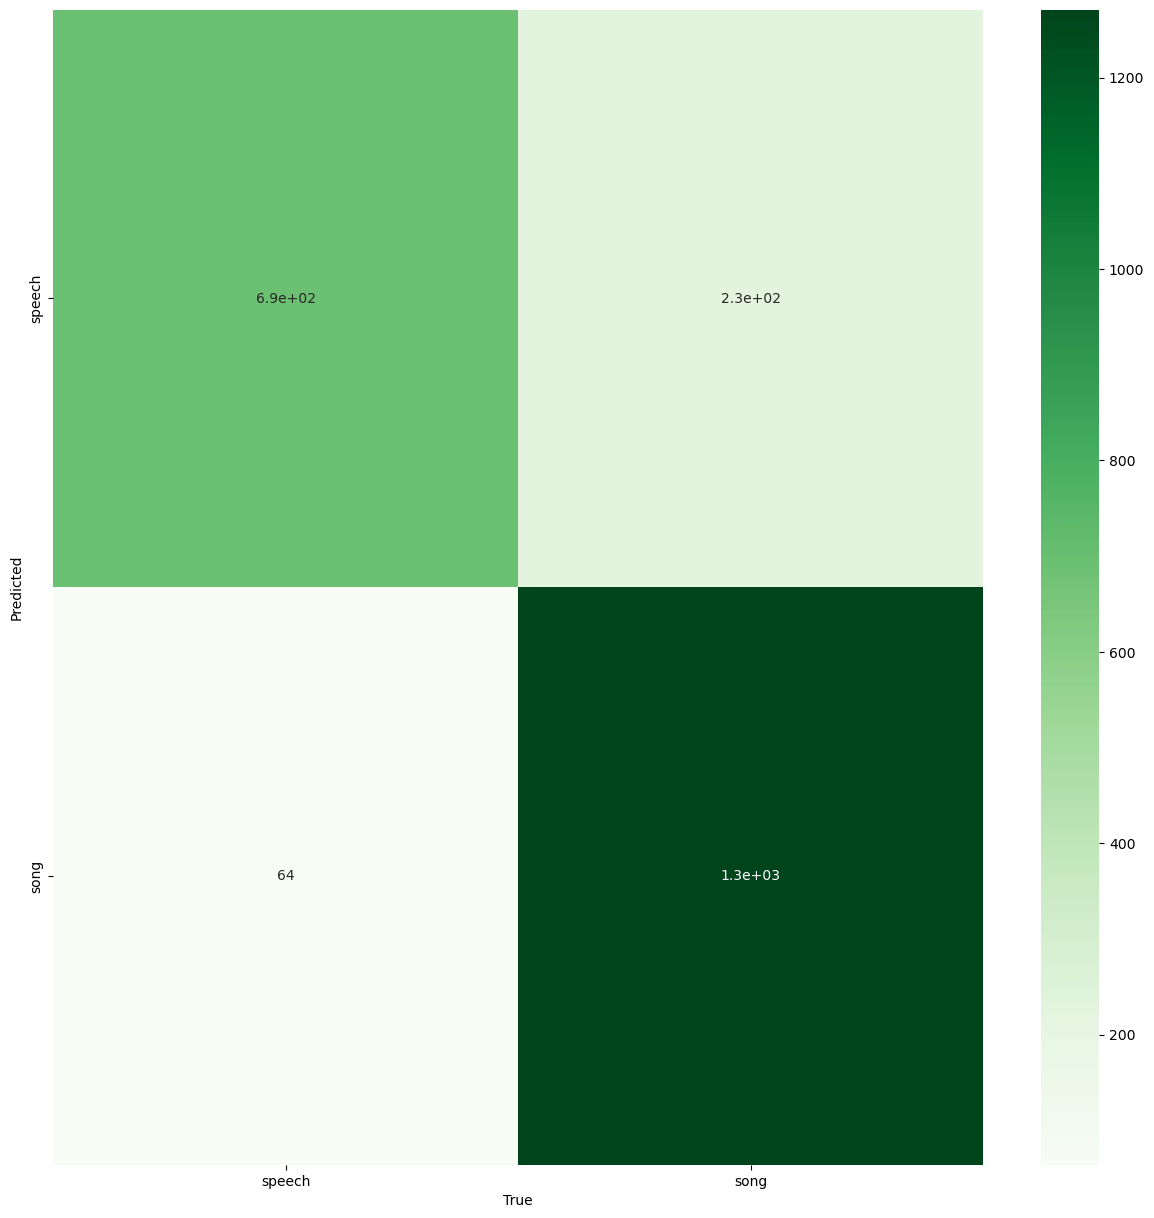

In [273]:
plt.figure(figsize=(15,15))
cf = confusion_matrix(df_full.vocal_channel, vocal_channel)
sns.heatmap(cf, annot=True, cmap="Greens", xticklabels = ["speech", "song"], yticklabels = ["speech", "song"])
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()